## We implement linear regression in this notebook. Use diabetes dataset as an example

## Load the diabetes data and see its shape

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print('# of samples:',diabetes.data.shape[0])
print('# of features:',diabetes.data.shape[1])

# of samples: 442
# of features: 10


## We only take one feature since we want to visualize the result. We take feature 'Body mass index' which seems relevant to diabetes

## Split the data to train (80%) and test (20%) sets to see our performance

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

# Body mass index feature is the third one, whose index is 2
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Build the model. We use gradient descent algorithm here.

## First define the cost function MSE

In [3]:
def MSE(b,m,points, labels):
    totalError = 0.
    for i in range(len(points)):
        x = points[i][0]
        y = labels[i]
        totalError += (y-(m*x + b)) ** 2
    return totalError/ len(points)

## Then we can write our gradient descent algorithm

In [4]:
def step_gradient(b, m, points, labels, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(len(points)):
        x = points[i][0]
        y = labels[i]
        b_gradient += -(1/N) * (y - (m * x + b))
        m_gradient += -(1/N) * x * (y - (m * x + b))
    new_b = b - (learning_rate * b_gradient)
    new_m = m - (learning_rate * m_gradient) 
    return [new_b,new_m]

def gradient_descent(points, labels, init_b=0, init_m=0, num_iteartions=100000, learning_rate=0.01):
    b = init_b
    m = init_m
    for i in range(num_iteartions):
        b,m = step_gradient(b, m, points, labels, learning_rate)
        if i%10000==0:
            print("After {0} iterations b = {1}, m = {2}, error = {3}".format(i, b, m, MSE(b, m, points, labels)))
    return [b,m]

## We can run our model now

In [5]:
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(0, 0, MSE(0, 0, X_train, y_train)))
print("Running...")
[b, m] = gradient_descent(X_train, y_train)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(100000, b, m, MSE(b, m, X_train, y_train)))


Starting gradient descent at b = 0, m = 0, error = 29229.68838526912
Running...
After 0 iterations b = 1.529178470254957, m = 0.02142624929794748, error = 28764.257636142942
After 10000 iterations b = 152.80965469795495, m = 184.82753213782155, error = 5160.360247058913
After 20000 iterations b = 152.72139841666478, m = 333.9237083535424, error = 4714.072399907466
After 30000 iterations b = 152.65016127951642, m = 454.26851099101475, error = 4423.311015630683
After 40000 iterations b = 152.59266135276985, m = 551.4062907077572, error = 4233.876812736387
After 50000 iterations b = 152.54624958345687, m = 629.8122379651815, error = 4110.458370100144
After 60000 iterations b = 152.50878775606603, m = 693.0985574925668, error = 4030.0499129681602
After 70000 iterations b = 152.47854998378892, m = 744.1808845279384, error = 3977.662928979063
After 80000 iterations b = 152.45414319597424, m = 785.41260972282, error = 3943.5322393804577
After 90000 iterations b = 152.43444295860314, m = 818.6

## Test our model

In [6]:
lr = lambda data: b+m*data

predict_y = lr(X_test)
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predict_y)
print(MSE)

3947.2506817817534


## Visualize the result

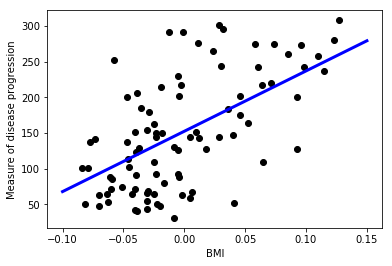

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

x_draw = np.linspace(-0.1, 0.15)
y_draw = lr(x_draw)

plt.xlabel('BMI')
plt.ylabel("Measure of disease progression")
plt.scatter(X_test, y_test,  color='black')
plt.plot(x_draw, y_draw, color='blue', linewidth=3)